In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
readFile = 'C:\\Users\\Minh Chi\\Downloads\\boDuLieu\\lab 2-3\\ThiTHPT2018.csv'
df = pd.read_csv(readFile)
df

C:\Users\Minh Chi\AppData\Local\Temp\ipykernel_12244\2609869967.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(readFile)


,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,Unnamed: 10,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh,Ten Tinh,Vung mien
0,1,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,NaN,13.25,9.75,NaN,18,Bac Giang,Mien Bac
1,2,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,NaN,22.50,25.3,NaN,18,Bac Giang,Mien Bac
2,3,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,NaN,17.25,16.50,NaN,15.5,15.75,18,Bac Giang,Mien Bac
3,4,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,NaN,14.00,11.75,NaN,18,Bac Giang,Mien Bac
4,5,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,NaN,16.50,13.55,NaN,18,Bac Giang,Mien Bac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744391,744392,4.6,4.50,6.0,3.75,3.00,3.25,NaN,NaN,NaN,NaN,11.35,10.85,NaN,15.1,14.35,52,Ba Ria Vung Tau,Mien Nam
744392,744393,7.0,6.00,5.0,5.25,5.50,4.00,NaN,NaN,NaN,NaN,17.75,16.50,NaN,18,17.25,52,Ba Ria Vung Tau,Mien Nam
744393,744394,5.2,3.50,4.0,6.25,5.50,2.25,NaN,NaN,NaN,NaN,16.95,12.95,NaN,12.7,15.45,52,Ba Ria Vung Tau,Mien Nam
744394,744395,7.8,4.50,5.4,7.50,6.25,3.00,NaN,NaN,NaN,NaN,21.55,17.05,NaN,17.7,20.70,52,Ba Ria Vung Tau,Mien Nam


In [4]:
adv = df[['Toan', 'Van', 'Anh']].mean()
adv

Toan    4.884162
Van     5.443449
Anh     3.933543
dtype: float64

In [4]:
# Lấy vị trí cột "Toan" và "GDCD"
start = df.columns.get_loc("Toan")
end = df.columns.get_loc("GDCD") + 1  # +1 vì slicing không bao gồm cột cuối nếu không cộng thêm

# Chọn các cột môn học dựa trên vị trí
subjects = df.iloc[:, start:end]

# Tính độ lệch chuẩn và trung vị
dolechchuan = subjects.std()
trungvi = subjects.median()
Usually = subjects.mode() # gia trị thường xuyên

print('Độ lệch chuẩn\n',dolechchuan)
print('--------------------------------------')
print('Trung vi\n', trungvi)
print('--------------------------------------')
print('Gia tri thường xuyên\n', Usually)

Độ lệch chuẩn
 Toan    1.440636
Van     1.447770
Anh     1.567942
Ly      1.531097
Hoa     1.523851
Sinh    1.244402
Su      1.241262
Dia     1.257440
GDCD    1.233368
dtype: float64
--------------------------------------
Trung vi
 Toan    5.00
Van     5.50
Anh     3.60
Ly      5.00
Hoa     4.75
Sinh    4.50
Su      3.75
Dia     5.50
GDCD    7.25
dtype: float64
--------------------------------------
Gia tri thường xuyên
    Toan  Van  Anh   Ly  Hoa  Sinh    Su   Dia  GDCD
0   5.4  6.0  3.0  5.0  5.0  4.25  3.25  5.25   7.5


In [5]:
tuviphan1 = df[['Toan', 'Van', 'Anh']].quantile(.25)
tuviphan2 = df[['Toan', 'Van', 'Anh']].quantile(.50)
tuviphan3 = df[['Toan', 'Van', 'Anh']].quantile(.75)
print(tuviphan1)
print("-----------------------------------------------------")
print(tuviphan2)
print("-----------------------------------------------------")
print(tuviphan3)


Toan    3.8
Van     4.5
Anh     2.8
Name: 0.25, dtype: float64
-----------------------------------------------------
Toan    5.0
Van     5.5
Anh     3.6
Name: 0.5, dtype: float64
-----------------------------------------------------
Toan    6.0
Van     6.5
Anh     4.6
Name: 0.75, dtype: float64


In [6]:
chieuCao = tuviphan3 - tuviphan1
chieuCao

Toan    2.2
Van     2.0
Anh     1.8
dtype: float64

In [11]:
min = tuviphan1 - 1.5*chieuCao
max = tuviphan3 + 1.5*chieuCao
print(min, max)

Toan    0.5
Van     1.5
Anh     0.1
dtype: float64 Toan    9.3
Van     9.5
Anh     7.3
dtype: float64


In [15]:
thongke = df.groupby('Ten Tinh')[['Toan', 'Van', 'Anh']].agg(['mean', 'median', 'std', 'max'])
thongke

Toan                              Van                   \
                      mean median       std   max      mean median       std   
Ten Tinh                                                                       
 BInh Duong       5.178798    5.2  1.221755   8.8  5.644745   5.75  1.114282   
 BInh Thuan       4.985884    5.0  1.229253   9.0  6.054283   6.00  1.156058   
 Ba Ria Vung Tau  5.268633    5.4  1.270500   9.0  5.048650   5.00  1.293025   
 Bac Giang        4.676841    4.6  1.455399   9.4  5.620116   5.75  1.360498   
 Bac Kan          3.933946    3.8  1.273532   8.6  5.820039   6.00  1.634524   
 Bac Lieu         4.947216    5.0  1.240736   9.8  6.200237   6.25  1.171901   
 Bac Ninh         5.010832    5.0  1.557012   9.8  5.348718   5.25  1.615666   
 Ben Tre          5.020316    5.0  1.190857   9.4  5.299480   5.25  1.248422   
 Binh Dinh        4.918991    5.0  1.395445   9.0  5.184650   5.25  1.386622   
 Binh Phuoc       4.952554    5.0  1.350677   9.2  5.227164   5.25  1.362637   
 Ca Mau           4.618933    4.6  1.268969   8.8  5.563526   5.50  1.350975   
 Can Tho          4.851395    5.0  1.414466   9.2  5.736604   5.75  1.474125   
 Cao Bang         3.851101    3.6  1.332094   8.2  5.428270   5.50  1.814369   
 Da Nang          5.117788    5.2  1.442155   9.6  4.921257   5.00  1.486278   
 Dac Lak          4.614568    4.6  1.496383   9.2  5.092350   5.25  1.508226   
 Dak Nong         4.673020    4.6  1.375097   8.8  4.808847   5.00  1.338253   
 Dien Bien        4.114222    4.0  1.311870   9.6  5.734784   6.00  1.645356   
 Dong Nai         4.943011    5.0  1.309963   9.0  4.827402   5.00  1.359295   
 Dong Thap        5.022287    5.0  1.225756   9.2  5.912693   6.00  1.268065   
 Gia Lai          4.613649    4.6  1.469500   9.2  5.364353   5.50  1.631426   
 Ha Giang         3.494335    3.2  1.433978   9.6  4.388424   4.25  1.586289   
 Ha Nam           5.214116    5.4  1.435920   9.2  6.293296   6.50  1.459948   
 Ha Tinh          4.710925    4.6  1.445407   9.2  6.246342   6.25  1.426918   
 Hai Duong        4.997863    5.0  1.488915   9.4  5.758120   6.00  1.586993   
 Ho Chi MInh      5.413035    5.4  1.241950  10.0  5.393044   5.50  1.113510   
 Hoa Binh         3.730630    3.4  1.498441   9.4  5.052799   5.00  1.604340   
 Hue              4.887979    5.0  1.513530   9.4  4.895738   5.00  1.328521   
 Hung Yen         4.941104    5.0  1.567700   9.6  5.529857   5.75  1.553495   
 Khanh Hoa        4.923866    5.0  1.400259   9.2  5.459481   5.50  1.465307   
 Kien Giang       4.594751    4.6  1.274290   8.6  5.571905   5.75  1.368589   
 Kon Tum          4.783367    4.8  1.464293   9.2  5.040466   5.00  1.593848   
 Lai Chau         4.263858    4.2  1.167487   9.4  4.621799   4.50  1.511475   
 Lam Dong         5.095552    5.2  1.251575   9.0  5.680852   5.75  1.195321   
 Lang Son         3.938069    3.8  1.317231   9.4  5.599780   5.75  1.614724   
 Lao Cai          4.505253    4.4  1.385180   9.2  5.688672   5.75  1.471677   
 Long An          4.956483    5.0  1.254089   9.0  5.536261   5.50  1.316804   
 Nam Dinh         5.492450    5.6  1.427485   9.0  6.027596   6.00  1.232002   
 Ninh Binh        5.169798    5.2  1.484771   9.2  5.965356   6.00  1.528396   
 Ninh Thuan       4.547124    4.6  1.377607   8.6  5.101909   5.25  1.301953   
 Phu Tho          4.690354    4.6  1.448446  10.0  5.774462   6.00  1.438176   
 Phu Yen          4.767671    4.8  1.395384   9.2  5.051966   5.00  1.352561   
 Quang Binh       4.297570    4.2  1.432774   8.8  5.207347   5.25  1.350987   
 Quang Nam        4.776739    4.8  1.451918   9.0  5.166265   5.25  1.479867   
 Quang Ngai       4.887744    5.0  1.488494   9.4  4.788791   5.00  1.519505   
 Quang Tri        4.698058    4.6  1.485782   9.4  5.211762   5.25  1.420682   
 Soc Trang        4.515505    4.4  1.319669   9.0  5.335623   5.50  1.313199   
 Tay Ninh         5.020693    5.0  1.209883   9.2  5.345325   5.50  1.183092   
 Thai Binh        5.17

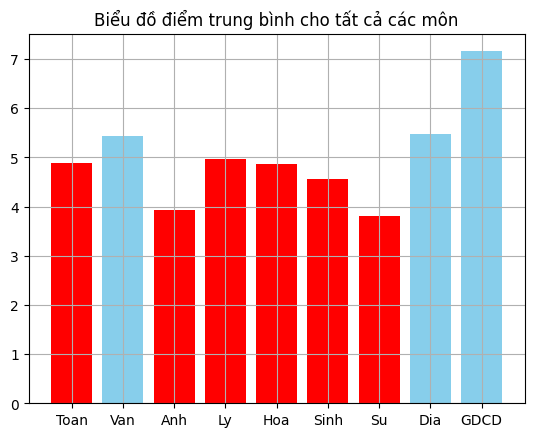

In [20]:
subjects = ['Toan', 'Van', 'Anh', 'Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD']
mode_subjects = df[subjects].mean()
color = []
for score in mode_subjects:
    if score < 5:
        color.append('red')
    else:
        color.append('skyblue')
plt.bar(mode_subjects.index, mode_subjects.values, color = color)
# plt.ylim(0, 10)
plt.grid(True)
plt.title('Biểu đồ điểm trung bình cho tất cả các môn')
plt.show()

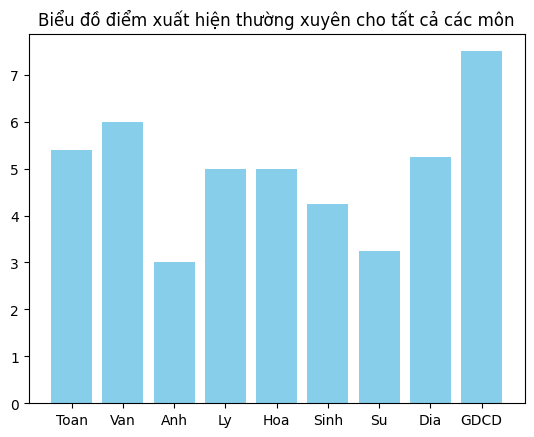

In [21]:
subjects = ['Toan', 'Van', 'Anh', 'Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD']
mode_subjects = df[subjects].mode().iloc[0]

plt.bar(mode_subjects.index, mode_subjects.values, color = 'skyblue')
# plt.ylim(0, 10)
# plt.grid(axis='y', linestyle = '-', alpha = 0.7)
plt.title('Biểu đồ điểm xuất hiện thường xuyên cho tất cả các môn')
plt.show()

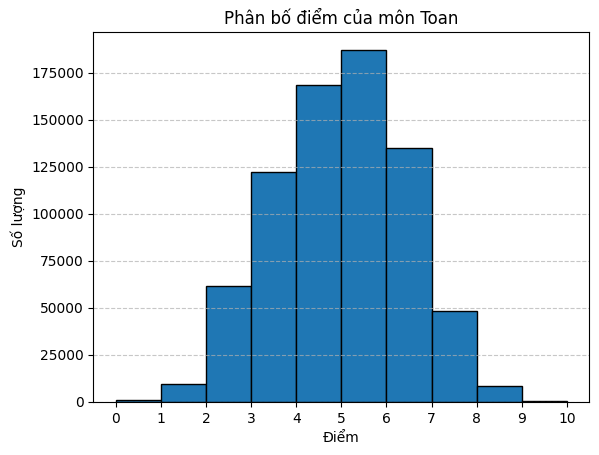

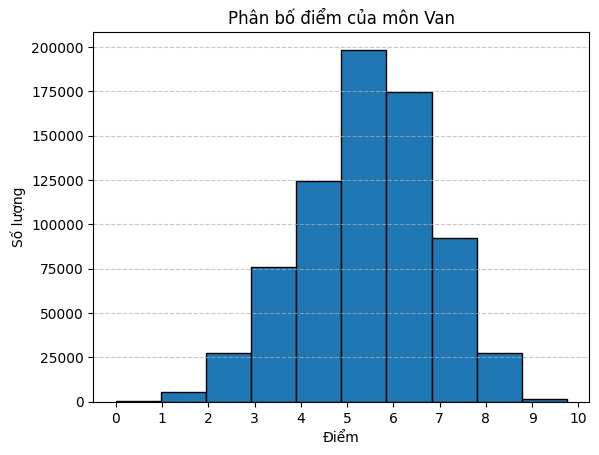

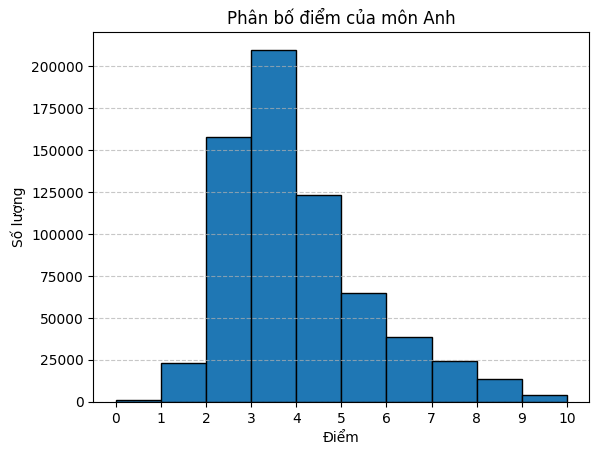

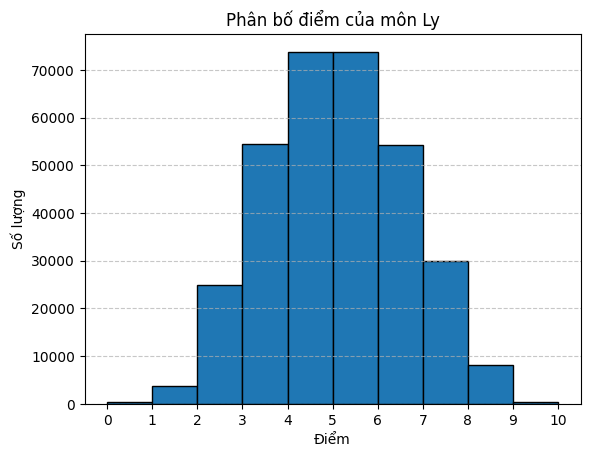

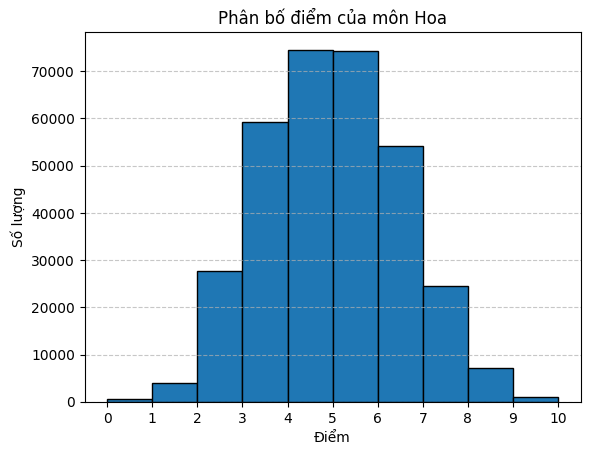

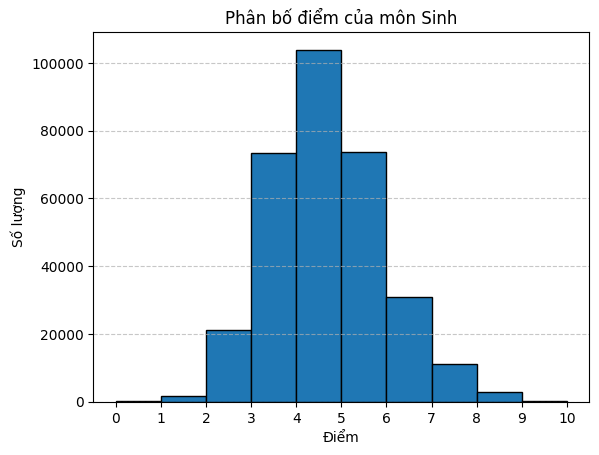

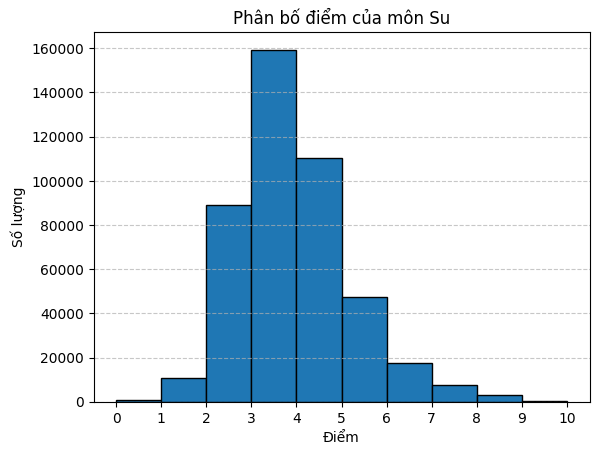

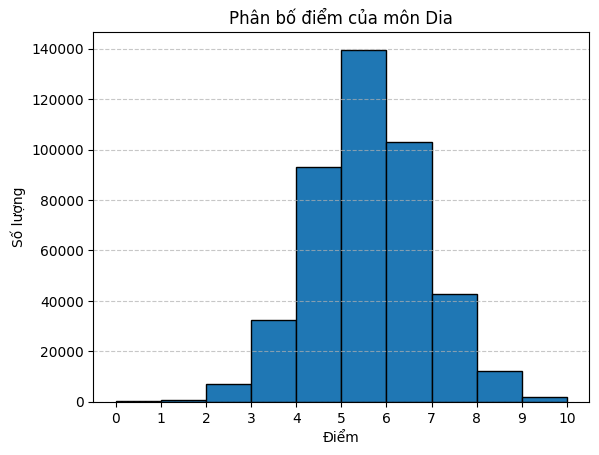

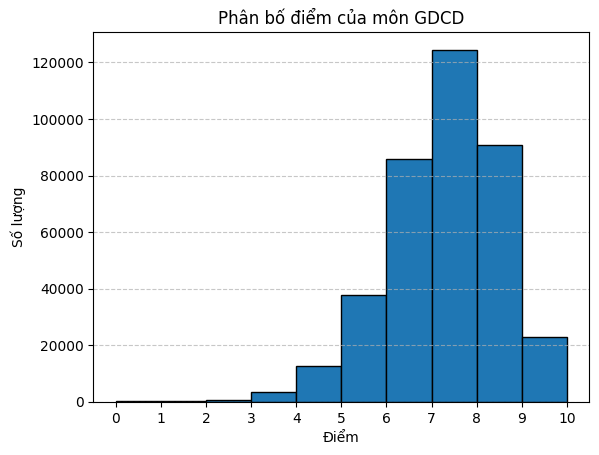

In [22]:
subjects = ['Toan', 'Van', 'Anh', 'Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD']
for subject in subjects:
    # plt.figure(figsize=(8, 5))
    data = df[subject].dropna()
    plt.hist(data, bins=10, edgecolor= 'k')
    plt.xlabel('Điểm')
    plt.ylabel('Số lượng')
    plt.title(f'Phân bố điểm của môn {subject}')
    plt.xticks(range(0, 11))  # Chỉ hiển thị các điểm nguyên từ 0 đến 10
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()




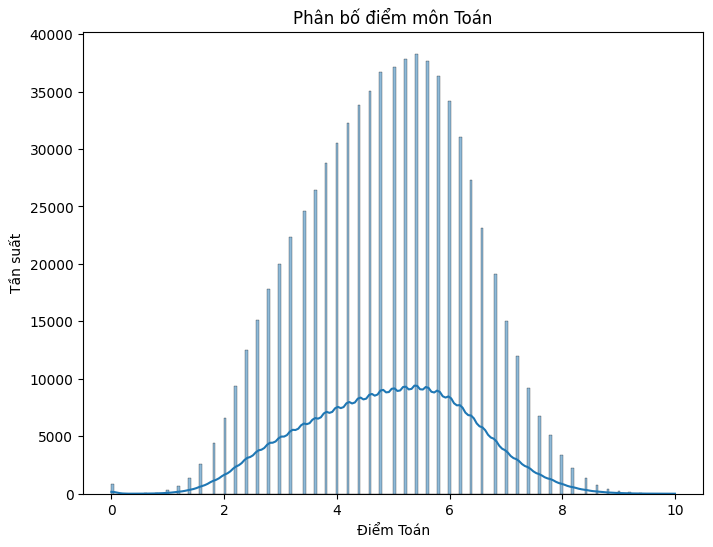

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử DataFrame df có cột "Toán"
plt.figure(figsize=(8, 6))
sns.histplot(df['Toan'], kde=True)
plt.title('Phân bố điểm môn Toán')
plt.xlabel('Điểm Toán')
plt.ylabel('Tần suất')
plt.show()
